In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv(r"C:\Users\U S E R\Downloads\online_retail_II.csv") 
# Desribe data
df.describe()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Data cleaning

In [3]:
#Missing values
df.isnull().sum()
# Drop null values
df.dropna(subset=['Description'], inplace=True)
df.dropna(subset=['Customer ID'], inplace=True)

In [4]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [5]:
#Duplicates
df.duplicated().sum()
df.drop_duplicates(inplace = True)
df.duplicated().sum()

np.int64(0)

In [6]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [7]:
df["Description"].value_counts()
df['Description'] = df['Description'].astype(str).str.lower().str.strip()
# Maxsus belgilarni olib tashlash (faqat harf, raqam, bo'shliq qoladi)
df['Description'] = df['Description'].str.replace(r'[^a-z0-9 ]', '', regex=True)
# Kategoriyaga aylantirish
df['Description'] = df['Description'].astype('category')

# Xotira foydalanishini tekshirish
print(df.memory_usage(deep=True))

Index           6383080
Invoice        43902065
StockCode      43167599
Description     2122484
Quantity        6383080
InvoiceDate    54256180
Price           6383080
Customer ID     6383080
Country        49673244
dtype: int64


In [8]:
# Ustunlarni string ga aylantirish
df['Invoice'] = df['Invoice'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)
# Harflarni olib tashlash
df['InvoiceNo_Clean'] = df['Invoice'].str.replace('[^0-9]', '', regex=True)
df['StockCode_Clean'] = df['StockCode'].str.replace('[^0-9]', '', regex=True)
# Raqamlarga aylantirish
df['InvoiceNo_Clean'] = pd.to_numeric(df['InvoiceNo_Clean'], errors='coerce')
df['StockCode_Clean'] = pd.to_numeric(df['StockCode_Clean'], errors='coerce')

# int32 ga optimallashtirish (xotira tejash uchun)
df['InvoiceNo_Clean'] = df['InvoiceNo_Clean'].astype('Int32')  # NaN uchun Int32
df['StockCode_Clean'] = df['StockCode_Clean'].astype('Int32')
# Asl ustunlarni yangilash
df['Invoice'] = df['InvoiceNo_Clean']
df['StockCode'] = df['StockCode_Clean']
df = df.drop(columns=['InvoiceNo_Clean', 'StockCode_Clean'])


In [9]:
df.dtypes

Invoice           Int32
StockCode         Int32
Description    category
Quantity          int64
InvoiceDate      object
Price           float64
Customer ID     float64
Country          object
dtype: object

In [10]:
df.dtypes
df.head()
#Data formating
df['Invoice'] = df['Invoice'].astype('Int32')
df['StockCode'] = df['StockCode'].astype('Int32')
df['Quantity'] = df['Quantity'].astype('Int32')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Country'] = df['Country'].astype('category')


In [11]:
df.dtypes

Invoice                 Int32
StockCode               Int32
Description          category
Quantity                Int32
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country              category
dtype: object

In [12]:
df.head()
df['total_revenue'] = df['Quantity'] * df['Price']

In [13]:
df.head()
df.rename(columns = {"total_revenue":"Total_revenue", "InvoiceDate":"Date"}, inplace = True)



In [14]:
df.head(20)

,Invoice,StockCode,Description,Quantity,Date,Price,Customer ID,Country,Total_revenue
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323,white cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,record frame 7 single size,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
5,489434,22064,pink doughnut trinket pot,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.6
6,489434,21871,save the planet mug,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
7,489434,21523,fancy font home sweet home doormat,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.5
8,489435,22350,cat bowl,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.6
9,489435,22349,dog bowl chasing ball design,12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom,45.0


# Analize and visualize

In [15]:
#Top product
top_products = df.groupby('Description')['Total_revenue'].sum().sort_values(ascending = False)
print(top_products)



Description
regency cakestand 3 tier               261110.95
white hanging heart tlight holder      237678.61
jumbo bag red retrospot                132180.02
assorted colour bird ornament          123631.87
postage                                110338.51
                                         ...    
tree of noah festive scented candle       -169.1
adjustment by peter on 24052010 1        -731.05
cruk commission                         -7933.43
discount                               -12785.34
manual                                -185701.19
Name: Total_revenue, Length: 5205, dtype: Float64


C:\Users\U S E R\AppData\Local\Temp\ipykernel_8444\1068615462.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_products = df.groupby('Description')['Total_revenue'].sum().sort_values(ascending = False)


C:\Users\U S E R\AppData\Local\Temp\ipykernel_8444\1113413896.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_product = df.groupby('Description')['Total_revenue'].sum().sort_values(ascending=False)
C:\Users\U S E R\AppData\Local\Temp\ipykernel_8444\1113413896.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_rev = df.groupby("Country")["Total_revenue"].sum().sort_values(ascending=False)[:10]



Mahsulotlar bo'yicha umumiy daromad:
Description
regency cakestand 3 tier               261110.95
white hanging heart tlight holder      237678.61
jumbo bag red retrospot                132180.02
assorted colour bird ornament          123631.87
postage                                110338.51
                                         ...    
tree of noah festive scented candle       -169.1
adjustment by peter on 24052010 1        -731.05
cruk commission                         -7933.43
discount                               -12785.34
manual                                -185701.19
Name: Total_revenue, Length: 5205, dtype: Float64


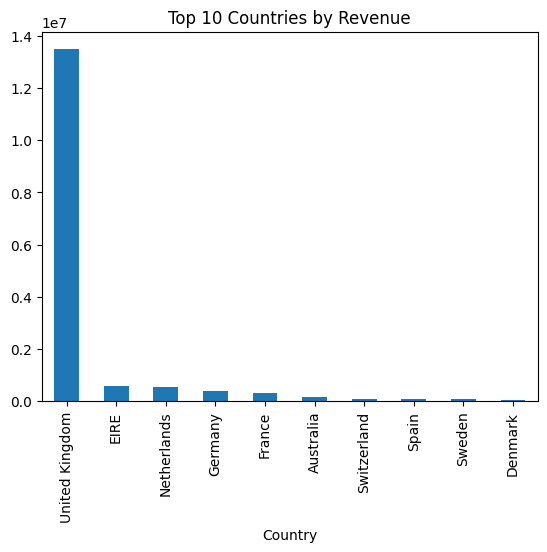

In [18]:
# Mahsulotlar bo'yicha umumiy daromad
revenue_by_product = df.groupby('Description')['Total_revenue'].sum().sort_values(ascending=False)
print("\nMahsulotlar bo'yicha umumiy daromad:")
print(revenue_by_product)

# Top 10 countries by revenue
country_rev = df.groupby("Country")["Total_revenue"].sum().sort_values(ascending=False)[:10]
country_rev.plot(kind="bar")
plt.title("Top 10 Countries by Revenue")
plt.show()

In [21]:
df.to_csv('online retail II', index= False)